In [21]:
import cv2
import numpy as np

def mask_to_line_segments(mask, arc_length_factor=0.01):
  """
  Converts a binary image mask into a list of line segments.

  Args:
    mask: A numpy array representing the binary image mask.

  Returns:
    A list of line segments, where each line segment is a tuple of two points 
    representing the start and end coordinates of the segment.
  """

  # Find contours in the binary mask
  contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  line_segments = []
  for contour in contours:
    # Approximate the contour with a polygon
    polygon = cv2.approxPolyDP(contour, arc_length_factor * cv2.arcLength(contour, True), True)
    # Extract line segments from the polygon
    for i in range(len(polygon)):
      start_point = tuple(polygon[i][0])
      end_point = tuple(polygon[(i + 1) % len(polygon)][0])
      line_segments.append((start_point, end_point))

  return line_segments

# Example usage:
# Assuming 'mask' is your binary image mask
mask = np.zeros((100, 100), dtype=np.uint8)
# ... (Code to create your binary mask) ...

line_segments = mask_to_line_segments(mask)

# Print the line segments
for segment in line_segments:
  print(segment)

Image loaded successfully


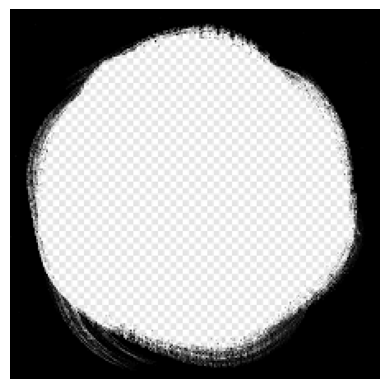

In [25]:
import matplotlib.pyplot as plt

# Load the image as a matrix
mask = cv2.imread('./sample_image_mask.png', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if mask is not None:
    print("Image loaded successfully")
else:
    print("Error loading image")

plt.imshow(mask, cmap='gray')
# plt.title('Binary Mask')
plt.axis('off')  # Hide the axis
plt.show()

In [30]:
line_segments = mask_to_line_segments(mask, arc_length_factor=0.005)

# Print the line segments
# for segment in line_segments:
#   print(segment)

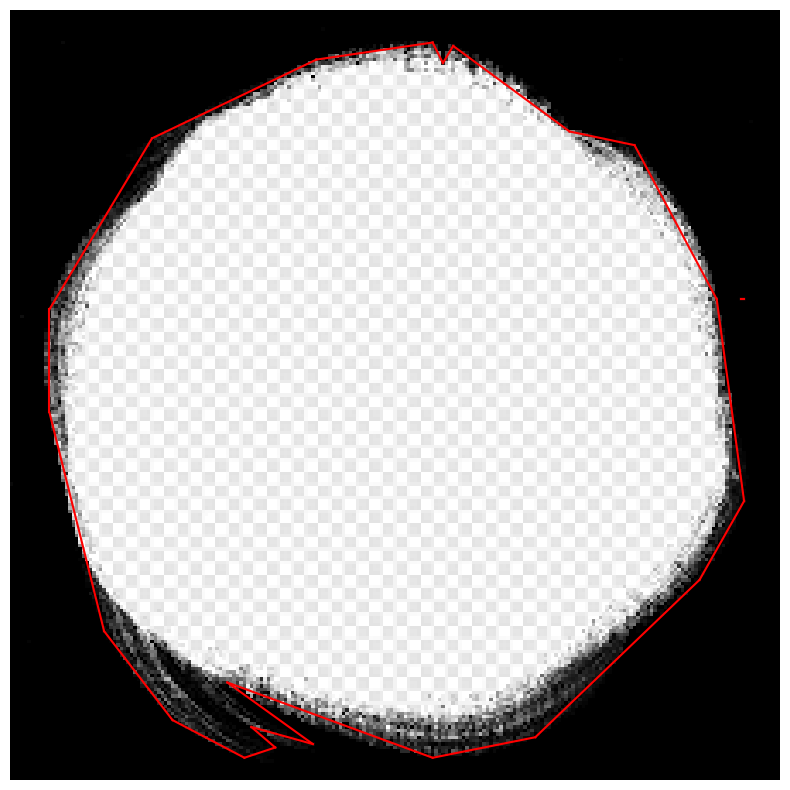

In [31]:
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='gray')

# Plot each line segment
for segment in line_segments:
    (x1, y1), (x2, y2) = segment
    plt.plot([x1, x2], [y1, y2], 'r-')

plt.axis('off')  # Hide the axis
plt.show()